# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [138]:
# Import needed modules here
import re
import numpy as np
import matplotlib.pyplot as plt

In [237]:
#General idea for code: 
#The date, county, state, case number, and death number is pushed into a list.
#The total case/death count is added for each state per day by adding all county case/death count for the day
#It then plots Case/Death count vs Day, starting at 0 for both.

# Open the most recent Covid19 data
file = open("../covidData_4.7.20.csv","r")

#Create a list of all states and their respective case/death count per day using regex
#note: (?:) is a negative grouping that allows me to check if a group exists and ignores it in the list
covid = re.findall(r"(?<=\d\-)(\d\d\-\d\d)(?:\,)(.*?)(?:,)(\w*\s*\w*)(?:,)(?:\d*)(?:,)(\d*)(?:,)(\d*)",file.read())

file.close()

# Define the two lists to be used in the plot
days = [0]
cd_num = [0]

# Changeable Variables
state = "New York"
case_or_death = "case"

# Function to gather all cases/deaths of an individual state and put into a list
def c_dplot(state,c_d):
    """Take the state name and gathers all cases or deaths from it"""
    
    init_date = covid[0][0]
    y=0
    cd_tot=0
    
    for i in range(len(covid)):
        #Checks if date is same as previous date to add to cd_tot variable
        if init_date == covid[i][0]:
            #Checks State
            if state == covid[i][2]:
                #Checks if death, else defaults to case count
                if c_d == "death":
                    cd_tot+=int(covid[i][4])
                else:
                    cd_tot+=int(covid[i][3])
        
        #Changes init_date to current date and adds previous dates cd_tot to cd_num
        else:
            init_date = covid[i][0]
            cd_num.append(cd_tot)
            cd_tot=0
            
            #Checks State
            if state == covid[i][2]:
                #Determines if death, else defaults to case count
                if c_d == "death":
                    cd_tot+=int(covid[i][4])
                else: 
                    cd_tot+=int(covid[i][3])
            #Adds another day to 'days[]'    
            y+=1
            days.append(y)
            

#main function
c_dplot(state,case_or_death)
#Prints the case/death number per day
print(cd_num)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 11, 22, 44, 89, 106, 142, 173, 217, 326, 421, 610, 732, 950, 1374, 2382, 4152, 7102, 10356, 15168, 20875, 25666, 33067, 38988, 44636, 53364, 59568, 67216, 75832, 83890, 92770, 102945, 114996, 122911, 130703]


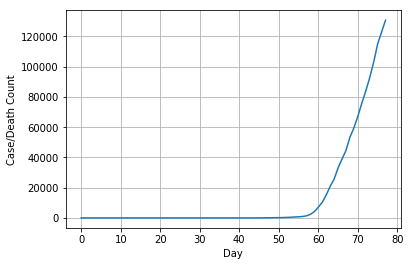

In [240]:
plt.ylabel("Case/Death Count")
plt.xlabel("Day")
plt.grid(True)
plt.plot(days,cd_num)

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [244]:
# Function to count total case counts per state per day using same states as Function 1
days = [0]
cd_num = [0]

# Changeable Variables
state = "Washington"
case_or_death = "death"
county = "Snohomish"

# Function to gather all cases/deaths of an individual state and put into a list
def c_dplot(state,c_d,county):
    """Take the state name and gathers all cases or deaths from it"""
    
    init_date = covid[0][0]
    y=0
    cd_tot=0
    
    for i in range(len(covid)):
        #Checks if date is same as previous date to add to cd_tot variable
        if init_date == covid[i][0]:
            #Checks State
            if state == covid[i][2]:
                if county == covid[i][1]:
                    #Checks if death, else defaults to case count
                    if c_d == "death":
                        cd_tot+=int(covid[i][4])
                    else:
                        cd_tot+=int(covid[i][3])
        
        #Changes init_date to current date and adds previous dates cd_tot to cd_num
        else:
            init_date = covid[i][0]
            cd_num.append(cd_tot)
            cd_tot=0
            
            #Checks State
            if state == covid[i][2]:
                #Checks County
                if county == covid[i][1]:
                    #Determines if death, else defaults to case count
                    if c_d == "death":
                        cd_tot+=int(covid[i][4])
                    else: 
                        cd_tot+=int(covid[i][3])
            #Adds another day to 'days[]'    
            y+=1
            days.append(y)
            

#main function
c_dplot(state,case_or_death,county)
print(cd_num)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 4, 5, 6, 7, 9, 10, 10, 15, 15, 18, 23, 23, 23, 30, 32, 39, 39, 41, 44, 48, 57]


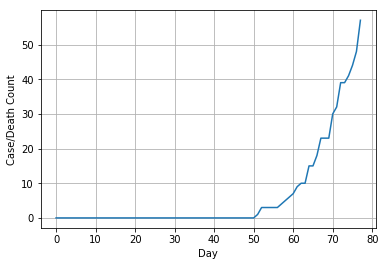

In [245]:
plt.ylabel("Case/Death Count")
plt.xlabel("Day")
plt.grid(True)
plt.plot(days,cd_num)